In [2]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from typing import List, Dict, Any
from IPython import get_ipython

# from pyautogen import C
# from pyautogen import ConversableAgent, AssistantAgent, UserProxyAgent, config_list_from_json
from autogen import AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager, config_list_from_json
# from autogen import ConversableAgent, UserProxyAgent

import pandas as pd

In [6]:
import pandas as pd

# The schema dictionary you provided
table_schema_dict_frontend = {
    "column_specification": "TEXT",
    "table_name": "TEXT",
    "database_name": "TEXT",
    "time_granu": "TEXT",
    "geo_granu": "TEXT",
    "db_description": "TEXT",
    "col_num": "INT",
    "row_num": "INT",
    "popularity": "INT",
    "usability_rating": "DECIMAL",
    "tags": "TEXT[]",
    "file_size_in_byte": "INT",
    "keywords": "TEXT[]",
    "task_queries": "TEXT[]",
    "metadata_queries": "JSONB",
}

# Short descriptions for each attribute
descriptions = {
    "column_specification": "Search over column name.",
    "table_name": "Name of the table.",
    "database_name": "Name of the database.",
    "time_granu": "Time granularity (e.g., Year, Month).",
    "geo_granu": "Geographic granularity (e.g., Country, City).",
    "db_description": "Short description of the dataset.",
    "col_num": "Number of columns in the table.",
    "row_num": "Number of rows in the table.",
    "popularity": "Popularity rank of the dataset.",
    "usability_rating": "User rating of dataset usability, scale from 0% to 100%.",
    "tags": "Tags associated with the dataset.",
    "file_size_in_byte": "Size of the dataset in bytes.",
    "keywords": "Keywords related to the dataset.",
    "task_queries": "Queries for dataset-related tasks.",
    "metadata_queries": "Queries for filtering metadata.",
}

# Convert the dictionary into a DataFrame with descriptions
df = pd.DataFrame(table_schema_dict_frontend.items(), columns=["Metadata Attribute", "Data Type"])

# Add descriptions
df["Description"] = df["Metadata Attribute"].map(descriptions)

# Display the table
df


,Metadata Attribute,Data Type,Description
0,column_specification,TEXT,Search over column name.
1,table_name,TEXT,Name of the table.
2,database_name,TEXT,Name of the database.
3,time_granu,TEXT,"Time granularity (e.g., Year, Month)."
4,geo_granu,TEXT,"Geographic granularity (e.g., Country, City)."
5,db_description,TEXT,Short description of the dataset.
6,col_num,INT,Number of columns in the table.
7,row_num,INT,Number of rows in the table.
8,popularity,INT,Popularity rank of the dataset.
9,usability_rating,DECIMAL,"User rating of dataset usability, scale from 0..."


In [3]:
csv_file_path ='../eval/eval_data_processed/eval_data_all.csv'
df = pd.read_csv(csv_file_path)
df


,table_name,database_name,example_rows_md,time_granu,geo_granu,db_description,col_num,row_num,popularity,usability_rating,tags,file_size_in_byte,keywords,task_queries,metadata_queries,example_rows_embed
0,adobe_stock_data.csv,Adobe's Stock Trends| Data Analysis📊,| Date | Open | High | Low | Close | Adj Close...,Day,NaN,**Adobe's Stock Trends📊**\n&gt; About Columns...,7,3563,28,1.000000,"{""arts and entertainment"",business,finance,inv...",381236,"{""stock prices"",""trading volume"",""adjusted clo...","{""Analyze the trends in Adobe's stock prices o...","[[""The dataset should have the finance tag"", ""...","[-0.057861358,0.022704618,0.025475899,-0.00809..."
1,CompanyReviews.csv,Arabic Company Reviews (عربي),| Unnamed: 0 | review_description | rating | c...,NaN,Country,## Context\nThe data was collected for the pur...,4,40046,1791,1.000000,"{global,intermediate,nlp,text,""ratings and rev...",4406789,"{""sentiment analysis"",""Arabic reviews"",""compan...","{""Build a machine learning model to classify t...","[[""The dataset should have nlp and ratings and...","[-0.050423842,0.0038793862,0.03792693,0.022398..."
2,Train.csv,E-Commerce Shipping Data,| ID | Warehouse_block | Mode_of_Shipment | Cu...,NaN,NaN,### Context\n\nAn international e-commerce com...,12,10999,33656,0.941176,"{business,beginner,""data visualization"",""data ...",440462,"{""Customer Rating"",""Mode of Shipment"",""Product...","{""Analyze the impact of different modes of shi...","[[""The dataset should have the business tag"", ...","[0.025823666,0.004384213,0.017643878,0.0033674..."
3,Epileptic Seizure Recognition.csv,Epileptic Seizure Recognition,| Unnamed | X1 | X2 | X3 | X4 | X5 | X6 | X7 |...,Second,NaN,### Context\n\nThis dataset is a pre-processed...,180,11500,8381,0.852941,"{neuroscience,health}",7623837,"{""EEG recording"",""epileptic seizure"",""brain ac...","{""develop a binary classifier to predict epile...","[[""The dataset should have the neuroscience ta...","[-0.0010664411,0.024389887,0.03020908,-0.01015..."
4,student_prediction.csv,Higher Education Students Performance Evaluation,| STUDENTID | AGE | GENDER | HS_TYPE | SCHOLAR...,NaN,NaN,###Abstract###\n\nThe data was collected from ...,33,145,9610,1.000000,"{research,education,""multiclass classification""}",11215,"{""student demographics"",""academic performance""...","{""Develop an ML model to predict end-of-term s...","[[""The dataset should be suitable for research...","[-0.02151722,0.0015942628,0.038603175,0.018207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,distance.csv,🧭 Large-Scale Route Optimization,| Source | Destination | Distance(M) |\n| --- ...,NaN,City,# Route Optimization - A Real World Scenario\n...,3,3782,93,0.941176,"{business,optimization}",88018,"{""Route Optimization"",Warehouse,""Delivery Truc...","{""Optimize the route assignment to minimize ov...","[[""The dataset should have the optimization ta...","[-0.014618317,-0.018714452,0.09986052,-0.01577..."
6499,large.csv,🧭 Traveling Salesman Problem,| 7.751835449506971898e-02 | 1.701756081581240...,NaN,NaN,# Purpose\nThis challenge is intended to be fu...,2,999,114,0.941176,"{business,education,optimization,graph}",50000,"{""Traveling Salesperson Problem"",""Graph Theory...","{""Develop an algorithm to find the optimal pat...","[[""The dataset should be tagged with 'graph'"",...","[-0.029669542,-0.017019529,0.0030461852,0.0176..."
6500,small.csv,🧭 Traveling Salesman Problem,| -9.358338684023913556e-01 | -1.7715331045098...,NaN,NaN,# Purpose\nThis challenge is intended to be fu...,2,29,114,0.941176,"{business,education,optimization,graph}",1522,"{""Traveling Salesperson"",""City Coordinates"",""G...","{""Optimize the route to visit all the cities m...","[[""The dataset should be related to graph opti...","[-0.018516421,-0.0038490344,0.03927726,-0.0012..."
6501,medium.csv,🧭 Traveling Salesman Problem,| 4.179924564742493187e-01 | 3.441119252755281...,NaN,NaN,# Purpose\nThis challenge is intended to 

In [6]:
df["usability_rating"][0]

1.0

In [7]:
df = pd.read_csv('../eval/eval_data_processed/eval_data_validation.csv.gz')
df

,table_name,database_name,example_rows_md,time_granu,geo_granu,db_description,col_num,row_num,popularity,usability_rating,tags,file_size_in_byte,keywords,task_queries,metadata_queries,example_rows_embed
0,adobe_stock_data.csv,Adobe's Stock Trends| Data Analysis📊,| Date | Open | High | Low | Close | Adj Close...,Day,NaN,**Adobe's Stock Trends📊**\n&gt; About Columns...,7,3563,28,1.000000,"{""arts and entertainment"",business,finance,inv...",381236,"{""stock prices"",""trading volume"",""adjusted clo...","{""Analyze the trends in Adobe's stock prices o...","[[""The dataset should have the finance tag"", ""...","[-0.057861358,0.022704618,0.025475899,-0.00809..."
1,online_shoppers_intention.csv,Online Shoppers Purchasing Intention Dataset,| Administrative | Administrative_Duration | I...,Month,Region,### Context\n\n**Data Set Information:**\n\nTh...,18,12330,5012,0.970588,"{business,education}",1072063,"{""session features"",""page metrics"",""visitor at...","{""develop ML model to predict likelihood of tr...","[[""The dataset should have the business and ed...","[-0.04784166,0.035040278,0.037469737,0.0062722..."
2,KAG_conversion_data.csv,Sales Conversion Optimization,| ad_id | xyz_campaign_id | fb_campaign_id | a...,NaN,NaN,### Context\n\nCluster Analysis for Ad Convers...,11,1143,17367,0.647059,"{business,internet,""online communities""}",60522,"{""ad campaigns"",clicks,impressions,""approved c...","{""analyze the effectiveness of ad campaigns by...","[[""The dataset should be tagged with 'business...","[0.009906768,0.016102025,0.002340862,0.0248798..."
3,Wholesale customers data.csv,Wholesale customers Data Set,| Channel | Region | Fresh | Milk | Grocery | ...,NaN,Region,The dataset refers to clients of a wholesale d...,8,440,14385,0.764706,"{business,finance}",15021,"{""annual spending"",""product categories"",""whole...","{""Segment customers based on their spending pa...","[[""The dataset should have business and financ...","[0.02009525,-0.008345489,0.03389906,0.02051180..."
4,countries-table.csv,World Population by Country,| country | rank | area | landAreaKm | cca2 | ...,Year,Country,**CONTENT**\n\nThe US Census Bureau's world po...,19,234,7459,1.000000,"{people,""social science"",demographics,""data vi...",30267,"{""global population"",""population growth"",""most...","{""Analyze the population growth trends of the ...","[[""The dataset should have the demographics ta...","[-0.0036904018,0.033710904,0.102336675,0.06742..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,telecom_data_dictionary.csv,🙁📡 Telecom Customer Churn Prediction,| Table | Field | Description |\n| --- | --- |...,Quarter,City,"# Contents\nThis dataset contains 2 tables, in...",3,40,10592,1.000000,"{business,internet,""exploratory data analysis""...",6173,"{""customer demographics"",""subscription service...","{""Develop a machine learning model to predict ...","[[""The dataset should have binary classificati...","[-0.032966413,0.03934943,0.013103961,0.0255195..."
1447,telecom_zipcode_population.csv,🙁📡 Telecom Customer Churn Prediction,| Zip Code | Population |\n| --- | --- |\n| 90...,NaN,Zip Code/Postal Code,"# Contents\nThis dataset contains 2 tables, in...",2,1671,10592,1.000000,"{business,internet,""exploratory data analysis""...",20631,"{""customer demographics"",""subscription service...","{""Analyze the impact of tenure on customer chu...","[[""The dataset should be related to business o...","[-0.025009504,0.0031352232,0.04722411,0.053681..."
1448,order_large.csv,🧭 Large-Scale Route Optimization,| Order_ID | Material_ID | Item_ID | Source | ...,Second,City,# Route Optimization - A Real World Scenario\n...,10,4635,93,0.941176,"{business,optimization}",602248,"{""route optimization"",""delivery trucks"",""order...","{""Analyze the delivery cost differences betwee...","[[""The dataset should have the business tag"", ...","[-0.017002787,0.015518417,0.032548193,-0.04836..."
1449,order_small.csv,🧭 Large-Scale Route Optimization,

In [2]:
load_dotenv()
AUTOGEN_USE_DOCKER = 0
openai_client = OpenAIClient()

In [36]:
# compare embedding of specific category with embedding of tags
# have chatgpt just choose a category given tags
# choose category based on embedding of whole dataset and embedding of specific category 

# Function to get category suggestion from OpenAI
categories = [
    "Health & Medicine",
    "Demographics & Population",
    "Economics & Finance",
    "Environment & Climate",
    "Social Science & Society",
    "Science & Technology",
    "Business & Industry",
    "Transportation & Infrastructure",
    "Agriculture & Food",
    "Energy & Utilities",
    "Law & Government",
    "Sports & Recreation",
    "Arts, Culture & Humanities",
    "Education & Learning",
    "Geography & Locations",
    "Public Safety & Security",
    "Energy & Resources",
    "Consumer Behavior & Lifestyle",
    "Infrastructure & Urban Planning",
    "Technology & Innovation",
    "Other"
]
def get_category_suggestion(tags):
    prompt = prompt = (
        f"Given the following table tags: {tags}, please choose the most appropriate category from this list:\n" +
        "\n".join(categories) +
        "\n\nReturn only the category name without any additional text or formatting."
    )
    messages = [ 
        {"role": "system", "content": prompt
        },
        {"role": "user", "content": tags}
        ]
    response = openai_client.infer_metadata_wo_instructor(
        model="gpt-4o-mini", 
        messages=messages,
    )    
    print(response)
    return response


with open('/Users/raelin/HITS/mock_data/mock_data_with_embedding.json', 'r') as file:
    data = json.load(file)
for dataset in data:
    tags = dataset['Table tags']  # This is assumed to be a list
    tags_string = ", ".join(tags)  # Convert list of tags to a string
    category = get_category_suggestion(tags_string) 
    dataset['Category'] = category  
    
with open('/Users/raelin/HITS/mock_data/mock_data_with_embedding_and_tag', 'w') as file:
    json.dump(data, file, indent=4)

Transportation & Infrastructure
Public Safety & Security
Economics & Finance
Economics & Finance
Public Safety & Security
Environment & Climate
Economics & Finance
Health & Medicine
Health & Medicine
Health & Medicine
Health & Medicine
Economics & Finance
Health & Medicine
Health & Medicine
Environment & Climate
Public Safety & Security
Environment & Climate
Public Safety & Security
Health & Medicine
Consumer Behavior & Lifestyle
Energy & Utilities
Demographics & Population
Health & Medicine
Health & Medicine
Health & Medicine
Health & Medicine
Health & Medicine
Environment & Climate
Public Safety & Security
Health & Medicine
Health & Medicine
Health & Medicine
Transportation & Infrastructure
Public Safety & Security
Law & Government
Science & Technology
Health & Medicine
Demographics & Population
Education & Learning
Other
Energy & Utilities
Demographics & Population
Health & Medicine
Public Safety & Security
Environment & Climate
Business & Industry
Health & Medicine
Economics & Fina

In [3]:
user_query = "i want to query on col_num"
filters = []
task = 'I want a dataset on voter demographics in presidential elections.'

llm_config = {
    "config_list": [
        {"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}
    ]
}

table_schema_dict = {
"table_name": "TEXT PRIMARY KEY",
"table_schema": "TEXT[]",
"table_desc": "TEXT",
"table_tags": "TEXT[]",
"previous_queries": "TEXT[]",
"example_records": "JSONB",
"col_num": "INT",
"popularity": "INT",
"time_granu": "TEXT[]",
"geo_granu": "TEXT[]",
"comb_embed": "VECTOR(1536)",
"query_embed": "VECTOR(1536)",
"table_category": "TEXT"
}

user = UserProxyAgent(
    name = "user_proxy",
    system_message="A human admin.",
    human_input_mode="ALWAYS",
    llm_config=llm_config
)

agent_chooser = AssistantAgent(name="agent_chooser", 
    system_message=f"""
    You are a helpful assistant suggests the next agent to call based on the user_query, existing filters, and existing task. You will output only one agent (query_refiner, graph_agent) based on the following logic:
    
    query_refiner: This agent refines search queries to make them specific. 
    - Call this agent if {task} is empty.

    graph_agent: This agent will graph the distribution of the categorical or numerical variable specified in {user_query}. 
    - Call this agent if {task} is not empty, and {user_query} specifies a metadata attribute from {table_schema_dict}.
    """,
    llm_config=llm_config
)

chat_result = user.initiate_chat(agent_chooser, message=user_query, summary_method="reflection_with_llm",max_turns=1)
print(chat_result.summary)


user_proxy (to agent_chooser):

i want to query on col_num

--------------------------------------------------------------------------------
agent_chooser (to user_proxy):

graph_agent

--------------------------------------------------------------------------------
User wants to query on a column number (col_num).


In [19]:
user_query = "I want a dataset for presidential elections."
edited_query = "I want a dataset on voter demographics in presidential elections."
initial_results = hyse_search(edited_query, search_space=None)

llm_config = {
    "config_list": [
        {"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}
    ]
}

table_schema_dict = {
"table_name": "TEXT PRIMARY KEY",
"table_schema": "TEXT[]",
"table_desc": "TEXT",
"table_tags": "TEXT[]",
"previous_queries": "TEXT[]",
"example_records": "JSONB",
"col_num": "INT",
"popularity": "INT",
"time_granu": "TEXT[]",
"geo_granu": "TEXT[]",
"comb_embed": "VECTOR(1536)",
"query_embed": "VECTOR(1536)",
"table_category": "TEXT"
}

user = UserProxyAgent(
    name = "user_proxy",
    system_message="A human admin.",
    human_input_mode="ALWAYS",
    llm_config=llm_config
)

query_refiner = AssistantAgent(name="query_refiner", 
    system_message="""
    You are a helpful assistant that refines search queries to make them specific. Users are currently exploring datasets and may not have a clear objective for the dataset in mind, so they require assistance in refining their intent. Ask a single, directed question to help the user clarify their search in one step, aiming to make the query specific enough to elicit their search intent. To be 'specific,' a query should include a topic and a clear task.

    For example, 'I want a dataset on presidential elections' is too broad. In this case, you should ask a question that helps clarify the task or narrow the scope in just one step.

    An example of a query that is specific enough would be, 'I want a dataset to train a predictive model on voter turnout in presidential elections.' This query has a clear topic (presidential elections) and a defined task (training a predictive model on voter turnout).

    After asking the question and receiving the user's response, provide an example of the refined query based on their input: 'An example of the refined query based on your input is: [refined query].' Additionally, offer 3 alternative queries by stating 'Alternative queries:' followed by concise examples to help guide them towards a more specific query. Otherwise, if the search query is specific enough (having both a topic and a clear task), inform the user that they can now proceed to query metadata attributes.
    """,
    llm_config=llm_config
)

metadata_agent = AssistantAgent(name="metadata_agent", 
    system_message=f"""     
    You are a helpful assistant that will help reduce the search space given the user query: {user_query}. Given all the metadata attributes and their type: {table_schema_dict}, propose the top 3 metadata attributes that will be useful to query over for the given user query.
    """,
    llm_config=llm_config
)

chat_results = user.initiate_chats(
    [
        {"recipient": query_refiner,
         "message": user_query,
         "summary_method": "reflection_with_llm",
         "max_turns": 3,
         "silent": False
         },
        {"recipient": metadata_agent,
         "message": "Please use the new refined query from the summary to generate metadata attribute suggestions.",
         "summary_method": "reflection_with_llm",
         "max_turns": 1,
         "silent": False
         },
    ]
)
print(chat_results)


********************************************************************************
Starting a new chat....

********************************************************************************
user_proxy (to query_refiner):

I want a dataset for presidential elections.

--------------------------------------------------------------------------------
query_refiner (to user_proxy):

What specific aspect of presidential elections are you interested in analyzing, such as voter demographics, electoral results, or campaign finance data?

--------------------------------------------------------------------------------
user_proxy (to query_refiner):

voter demographics

--------------------------------------------------------------------------------
query_refiner (to user_proxy):

An example of the refined query based on your input is: "I want a dataset on voter demographics in presidential elections."

Alternative queries:
1. "I want a dataset to analyze age distribution of voters in presidential 

In [14]:
#agent for query refinement
def main():
    user_query = "I want a dataset for presidential elections."
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    
    query_refiner = AssistantAgent(name="query_refiner", 
    system_message="""
    You are a helpful assistant that refines search queries to make them specific. Users are currently exploring datasets and may not have a clear objective for the dataset in mind, so they require assistance in refining their intent. Ask a single, directed question to help the user clarify their search in one step, aiming to make the query specific enough to elicit their search intent. To be 'specific,' a query should include a topic and a clear task.

    For example, 'I want a dataset on presidential elections' is too broad. In this case, you should ask a question that helps clarify the task or narrow the scope in just one step.

    An example of a query that is specific enough would be, 'I want a dataset to train a predictive model on voter turnout in presidential elections.' This query has a clear topic (presidential elections) and a defined task (training a predictive model on voter turnout).

    After asking the question and receiving the user's response, provide an example of the refined query based on their input: 'An example of the refined query based on your input is: [refined query].' Additionally, offer 3 alternative queries by stating 'Alternative queries:' followed by concise examples to help guide them towards a more specific query. Otherwise, if the search query is specific enough (having both a topic and a clear task), inform the user that they can now proceed to query metadata attributes.
    """,
    llm_config=llm_config
    )

    chat_result = user_proxy.initiate_chat(query_refiner, message=user_query, summary_method="reflection_with_llm", max_turns=2)
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

user_proxy (to query_refiner):

I want a dataset for presidential elections.

--------------------------------------------------------------------------------
query_refiner (to user_proxy):

What specific aspect of presidential elections are you interested in analyzing, such as voter demographics, electoral results, or campaign finance data?

--------------------------------------------------------------------------------
user_proxy (to query_refiner):

electoral results

--------------------------------------------------------------------------------
query_refiner (to user_proxy):

An example of the refined query based on your input is: "I want a dataset of electoral results from presidential elections in the United States."

Alternative queries:
1. "I want a dataset of state-by-state electoral results for the last five presidential elections."
2. "I want a dataset containing the electoral vote counts for presidential elections over the past century."
3. "I want a dataset on the popul

In [44]:
#agent for table description metadata refinement
def main():
    user_query = "I want a dataset to train a predictive model for presidential elections."
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    
    general_metadata_agent = AssistantAgent(name="general_metadata_agent", 
    system_message=f"""
    You are a helpful assistant that suggests five keywords the user can use to filter the description of a dataset based on the topic of the user query: {user_query}. First, identify the main topic of the user query, then generate specific keywords that reflect general themes related to that topic. Ensure the keywords are relevant to the dataset description and avoid focusing on specific tasks or outcomes. Make sure to keep the keywords simple and broad.

    For example, for the query "I'm interested in a dataset about air quality measurements in urban areas to analyze pollution trends," the identified topic is "air quality measurements in urban areas," and the generated keywords will be: urban areas, air quality, pollutants, health, environment.
    """,
    llm_config=llm_config
    )

    chat_result = user_proxy.initiate_chat(general_metadata_agent, message=user_query, summary_method="reflection_with_llm", max_turns=1)
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

user_proxy (to general_metadata_agent):

I want a dataset to train a predictive model for presidential elections.

--------------------------------------------------------------------------------
general_metadata_agent (to user_proxy):

The main topic of your query is "presidential elections." Here are five relevant keywords to help filter the dataset description:

1. elections
2. voting
3. demographics
4. political parties
5. historical data

--------------------------------------------------------------------------------
The user is seeking a dataset to train a predictive model for presidential elections, and relevant keywords include elections, voting, demographics, political parties, and historical data.


In [8]:
from typing import List, Dict, Any
import statistics

def calculate_statistics_of_columns(datasets: List[Dict[str, Any]], col_name:str) -> None:
    # Step 1: Initialize a list to hold all column numbers
    column_numbers = []

    # Step 2: Iterate through the datasets and collect the column numbers
    for dataset in datasets:
        column_number = dataset[col_name]  # Extract the column number
        column_numbers.append(column_number)  # Add to the list

    # Step 3: Calculate and print the median, minimum, and maximum of all column numbers
    if column_numbers:  # Check if the list is not empty
        median_value = statistics.median(column_numbers)
        min_value = min(column_numbers)
        max_value = max(column_numbers)

        print(f"Minimum of Popularity: {min_value}")
        print(f"Median of Popularity: {median_value}")
        print(f"Maximum of Popularity: {max_value}")
    
    return min_value, median_value, max_value


In [11]:
def numerical_counter(datasets: List[Dict[str, Any]], col_name:str, min_val:int, median_val:int, max_val:int) -> None:
    counts = []
    for dataset in datasets:
        number = dataset[col_name]  # Extract the category
        if isinstance(number, (int, float)):  # Ensure the value is numerical
            counts.append(number)  # Increment the count for this category
    
    # Create a histogram
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size
    ax.hist(counts, bins=10, color='skyblue', edgecolor='black')  # Plot histogram on the ax

    # Add labels and title
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col_name}')

    # Add a horizontal line for the median value
    hlin = ax.axhline(median_val, color = 'r', linestyle = '--')
    ax_slider = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_slider, label=col_name, valmin=min_val, valmax=max_val)

    def update_x(val):
        hlin.set_xdata(slider.val)
        fig.canvas.draw_idle()
    

    # Show plot
    # plt.show()

In [9]:
calculate_statistics_of_columns(initial_results, "col_num")

Minimum of Popularity: 1
Median of Popularity: 12
Maximum of Popularity: 65


(1, 12, 65)

Minimum of Popularity: 1
Median of Popularity: 12
Maximum of Popularity: 65


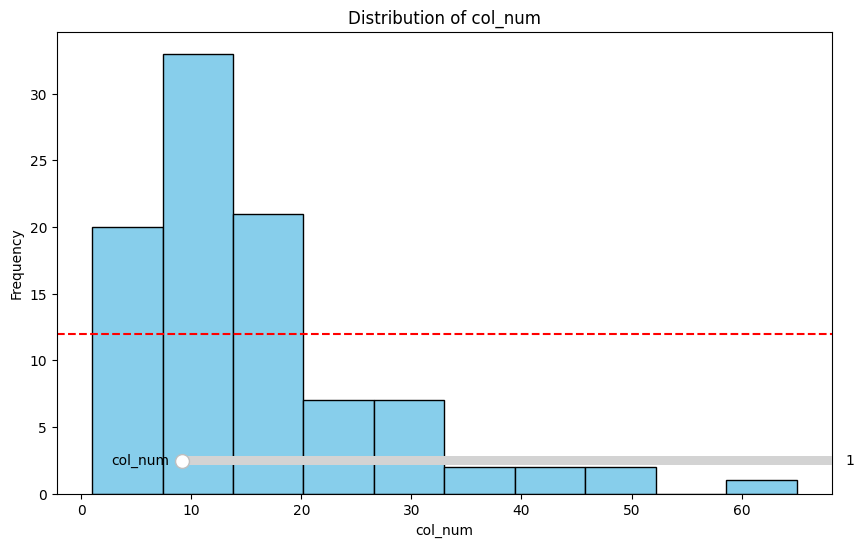

In [12]:
user_query = "I want a dataset to train a predictive model for presidential elections."
initial_results = hyse_search(user_query, search_space=None)  # Fetch initial results
stats = calculate_statistics_of_columns(initial_results, "col_num")
numerical_counter(initial_results, "col_num", stats[0], stats[1], stats[2])

user_proxy (to graph_agent):

I want to query on col_num.

--------------------------------------------------------------------------------
graph_agent (to user_proxy):

***** Suggested tool call (call_SrfWMxLNrcl5XexqMt20BWLo): numerical_counter *****
Arguments: 
{"col_name":"col_num"}
**********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION numerical_counter...


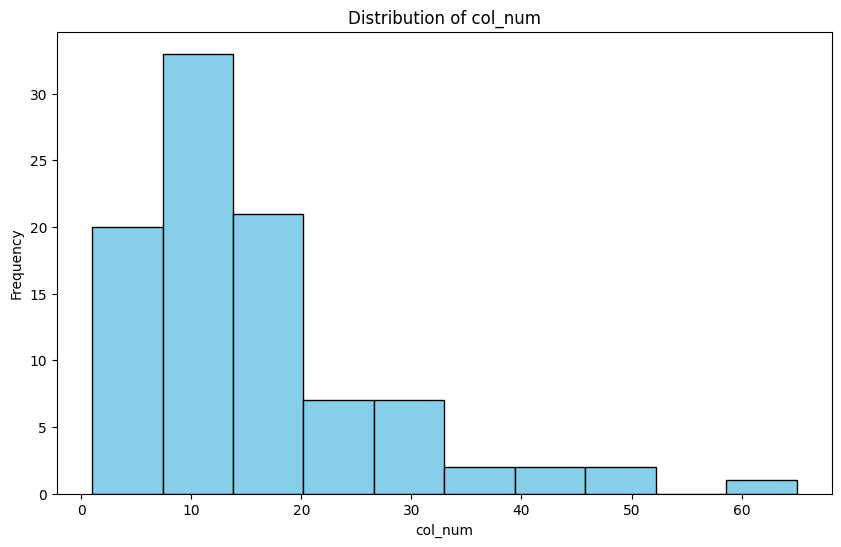

user_proxy (to graph_agent):

user_proxy (to graph_agent):

***** Response from calling tool (call_SrfWMxLNrcl5XexqMt20BWLo) *****
null
**********************************************************************

--------------------------------------------------------------------------------
graph_agent (to user_proxy):

It seems that there were no results returned for the query on `col_num`. Would you like to try querying a different column or perhaps check the overall structure of the dataset?

--------------------------------------------------------------------------------



In [13]:
from typing import List, Dict, Any
from collections import Counter
import os

def category_counter(datasets: List[Dict[str, Any]], col_name: str) -> None:    # Step 1: Initialize a Counter to hold the category counts
    category_counts = Counter()

    # Step 2: Iterate through the datasets and sum the categories
    for dataset in datasets:
        category = dataset[col_name]  # Extract the category
        category_counts[category] += 1  # Increment the count for this category

    # Step 3: Print the results
    for category, count in category_counts.items():
        print(f"Category: {category}, Count: {count}")
    
    # Step 3: Prepare data for plotting
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    # Step 4: Plot the distribution chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, counts, color='skyblue')
    plt.xlabel(col_name)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

    # Step 5: Add counts on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Add count above bar
    plt.show()

def numerical_counter(datasets: List[Dict[str, Any]], col_name:str) -> None:
    counts = []
    for dataset in datasets:
        number = dataset[col_name]  # Extract the category
        if isinstance(number, (int, float)):  # Ensure the value is numerical
            counts.append(number)  # Increment the count for this category
    # Create a histogram
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.hist(counts, bins=10, color='skyblue', edgecolor='black')  # Adjust 'bins' for bin size

    # Add labels and title
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col_name}')

    # Show plot
    plt.show()

# Main function
def main():
    user_query = "I want a dataset to train a predictive model for presidential elections."
    initial_results = hyse_search(user_query, search_space=None)  # Fetch initial results
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}

    table_schema_dict = {
        "table_name": "TEXT PRIMARY KEY",
        "table_schema": "TEXT[]",
        "table_desc": "TEXT",
        "table_tags": "TEXT[]",
        "previous_queries": "TEXT[]",
        "example_records": "JSONB",
        "col_num": "INT",
        "popularity": "INT",
        "time_granu": "TEXT[]",
        "geo_granu": "TEXT[]",
        "comb_embed": "VECTOR(1536)",
        "query_embed": "VECTOR(1536)",
        "table_category": "TEXT"
    }

    
    # Define User Proxy
    user_proxy = UserProxyAgent("user_proxy", 
                                human_input_mode="NEVER",
                                system_message="A human admin.", 
                                llm_config=llm_config)
    
    # Define Graph Agent
    graph_agent = AssistantAgent(name="graph_agent", 
        system_message=f"""
        You are a helpful AI assistant and have access to a IPython kernel to execute Python code.
        Refer to {table_schema_dict} to match the user input column to actual column name and determine whether it is a numerical or categorical type. For example, "INT" would be considered numerical and "TEXT" would be considered categorical. If the column is categorical, you will suggest the correct column name for the `category_counter` function on based on the user input. Otherwise if the column is numerical, suggest the correct column nam for the 'numerical_counter' function.
        You don't need to ask for the dataset again as it is already fetched.
        
        """,
        llm_config=llm_config
    )

    # Register the function with the correct dataset
    graph_agent.register_for_llm(name="category_counter", description="Returns counts for specified categorical column in a bar chart.")(category_counter)
    user_proxy.register_for_execution(name="category_counter")(lambda col_name: category_counter(initial_results, col_name))

    graph_agent.register_for_llm(name="numerical_counter", description="Returns counts for specified numerical column in a histogram chart.")(numerical_counter)
    user_proxy.register_for_execution(name="numerical_counter")(lambda col_name: numerical_counter(initial_results, col_name))
    
    # Initiate chat
    chat_result = user_proxy.initiate_chat(graph_agent, 
                                           message="I want to query on col_num.",
                                           summary_method=None,
                                           max_turns=2)
    print(chat_result.summary)

if __name__ == "__main__":
    main()


In [ ]:
def category_counter(datasets: List[Dict[str, Any]]) -> None:    # Step 1: Initialize a Counter to hold the category counts
    category_counts = Counter()

    # Step 2: Iterate through the datasets and sum the categories
    for dataset in datasets:
        category = dataset['table_category']  # Extract the category
        category_counts[category] += 1  # Increment the count for this category

    # Step 3: Print the results
    for category, count in category_counts.items():
        print(f"Category: {category}, Count: {count}")
    
    # Step 3: Prepare data for plotting
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    # Step 4: Plot the distribution chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title('Distribution of Dataset Categories')
    plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

    # Step 5: Add counts on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Add count above bar
    plt.savefig("category_chart.png")
    plt.close()

# To do this, first generate a distribution chart of the categories by passing the given search result space to the category counter function and rank the top 3 above the chart by accessing the file named 'category_chart.png'. Then, suggest 5 key words the user can use to filter the description with based on their user query: {user_query}.
def main():
    user_query = "I want a dataset to train a predictive model for presidential elections."
    initial_results = hyse_search(user_query, search_space=None)
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    
    general_metadata_agent = AssistantAgent(name="general_metadata_agent", 
    system_message=f"""
    You are a helpful agent that has access to a fairly specific task description. You are trying to narrow down the search result space: {initial_results}. 

    """,
    llm_config=llm_config
    )

    chat_result = user_proxy.initiate_chat(general_metadata_agent, message=initial_results, summary_method="reflection_with_llm",max_turns=3)
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

In [77]:
#agent for column numbers
def main():
    user_query = "I want a dataset to train a predictive model for presidential elections."
    initial_results = hyse_search(user_query, search_space=None)
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    popularity_numbers = [9060, 2212, 9340, 6462, 4892, 6222, 4474, 4076, 2318, 6401, 5770, 1410, 9927, 1248, 191, 3415, 6431, 867, 3699, 9095, 5334, 9383, 6839, 2856, 59, 3721, 7074, 4354, 4429, 6389, 2992, 7580, 1233, 1727, 6490, 25, 8443, 5594, 2052, 2887, 4469, 5529, 1686, 7532, 2710, 6850, 2992, 1504, 3006, 2174, 6872, 8750, 1820, 3754, 7253, 4630, 8103, 2436, 8353, 7439, 686, 6078, 5210, 6558, 5902, 159, 9782, 1957, 9034, 1959, 5403, 4428, 1681, 8833, 1982, 5718, 2617, 9703, 1621, 1019, 9471, 5214, 5929, 1497, 1864, 5351, 5375, 5801, 4058, 3812, 4916, 3309, 806, 4915, 2561]

    metadata_attribute = "popularity"
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    
    col_metadata_agent = AssistantAgent(name="col_metadata_agent", 
    system_message=f"""
    You are a helpful assistant that helps reduce the search space based on the user's query: {user_query}. Given the metadata attribute {metadata_attribute} and its corresponding value {popularity_numbers}, propose an appropriate filter for the metadata attribute. The proposed filter should reduce the search space by half, so it could be the median of the corresponding values.

    Display the suggested filter clearly at the top, followed by a brief, single reason explaining why this filter is suitable.

    For example:

    Suggested Filter: Column numbers > 10

    Reason: This filter will focus on datasets with a higher number of columns, which aligns with the complexity expected from the user's query.
    """,
    llm_config=llm_config
    )

    chat_result = user_proxy.initiate_chat(col_metadata_agent, message=user_query, summary_method="reflection_with_llm",max_turns=1)
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

user_proxy (to col_metadata_agent):

I want a dataset to train a predictive model for presidential elections.

--------------------------------------------------------------------------------
col_metadata_agent (to user_proxy):

Suggested Filter: Popularity > 4555

Reason: This filter will effectively reduce the search space by selecting datasets with above-median popularity values, which may correlate with more relevant features or broader engagement metrics necessary for modeling presidential elections.

--------------------------------------------------------------------------------
A dataset is needed to train a predictive model for presidential elections.


In [ ]:
from typing import List, Dict, Any
import statistics

def calculate_statistics_of_columns(datasets: List[Dict[str, Any]]) -> None:
    # Step 1: Initialize a list to hold all column numbers
    column_numbers = []

    # Step 2: Iterate through the datasets and collect the column numbers
    for dataset in datasets:
        column_number = dataset['col_num']  # Extract the column number
        column_numbers.append(column_number)  # Add to the list

    # Step 3: Calculate and print the median, minimum, and maximum of all column numbers
    if column_numbers:  # Check if the list is not empty
        median_value = statistics.median(column_numbers)
        min_value = min(column_numbers)
        max_value = max(column_numbers)

        print(f"Minimum of Column Numbers: {min_value}")
        print(f"Median of Column Numbers: {median_value}")
        print(f"Maximum of Column Numbers: {max_value}")
        print(column_numbers)
    
    return min_value, median_value, max_value


In [58]:
#agent to propose best metadata attribute
def main():
    user_query = "I want a dataset to train a predictive model for presidential elections."
    
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    initial_results = hyse_search(user_query, search_space=None)
    table_schema_dict = {
    "table_name": "TEXT PRIMARY KEY",
    "table_schema": "TEXT[]",
    "table_desc": "TEXT",
    "table_tags": "TEXT[]",
    "previous_queries": "TEXT[]",
    "example_records": "JSONB",
    "col_num": "INT",
    "popularity": "INT",
    "time_granu": "TEXT[]",
    "geo_granu": "TEXT[]",
    "comb_embed": "VECTOR(1536)",
    "query_embed": "VECTOR(1536)",
    "table_category": "TEXT"
}
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    
    metadata_agent = AssistantAgent(name="metadata_agent", 
    system_message=f"""
    You are a helpful assistant that will help reduce the search space given the user query: {user_query}. Given all the metadata attributes and their type: {table_schema_dict}, propose the top 3 metadata attributes that will be useful to query over for the given user query.
    """,
    llm_config=llm_config
    )

    chat_result = user_proxy.initiate_chat(metadata_agent, message=user_query, summary_method="reflection_with_llm",max_turns=1)
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

user_proxy (to metadata_agent):

I want a dataset to train a predictive model for presidential elections.

--------------------------------------------------------------------------------
metadata_agent (to user_proxy):

To effectively reduce the search space for a dataset that can be used to train a predictive model for presidential elections, the top 3 metadata attributes to query over are:

1. **table_tags**: This attribute can provide relevant keywords or phrases associated with the dataset, which can help identify datasets specifically related to presidential elections, voting behavior, or political analytics.

2. **table_desc**: The description of the dataset can give detailed insights into its contents and relevance, allowing you to determine if the dataset includes historical data, electoral outcomes, demographics, or any other pertinent information for predictive modeling.

3. **geo_granu**: This attribute indicates the geographical granularity of the data, which is essential 

In [6]:
def main():
    user_query = "I want a dataset on a classification model for presidential elections."
    initial_results = hyse_search(user_query, search_space=None)
    print("Number of datasets found:", len(initial_results))

    # Ensure there are results to proceed with
    if not initial_results:
        print("No datasets found. Please refine your query.")
        return
    
    # example LLM config for the entrypoint agent
    llm_config = {"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ.get('OPENAI_API_KEY')}]}
    
    user_proxy = UserProxyAgent("user_proxy", 
                                        system_message="A human admin.", 
                                        llm_config=llm_config)
    tags_agent = AssistantAgent(name="tags_agent", 
                                   system_message="""You are a helpful assistant that identifies dataset categories by using only the table_tags attribute. Please sum up all the possible categories and graph them on a distribution chart.""",
                                   llm_config=llm_config
                                   )
    query_refiner = AssistantAgent(name="query_refiner", 
                                   system_message="""You are a helpful assistant that helps refine the query. Refine on the semantics of the task for initial queries. Once search space is less than 100 datasets, generate queries to help refine on the avaliable metadata.""",
                                   llm_config=llm_config
                                   )
    
    metadata_agent = AssistantAgent(name="metadata_agent", 
                                   system_message="""You are a helpful assistant that presents the top 3 metadata attributes that users can query over, to reduce the search space by half. """,
                                   llm_config=llm_config
                                   )
    
    groupchat = GroupChat(agents=[user_proxy, tags_agent, query_refiner, metadata_agent], messages=[], max_round = 9)
    manager = GroupChatManager(groupchat=groupchat, llm_config=llm_config)

    chat_result = user_proxy.initiate_chat(manager, message= f"{user_query} Here are the datasets: {initial_results}", summary_method="reflection_with_llm")
    print(chat_result.summary)
    
if __name__ == "__main__":
    main()

Number of datasets found: 95
user_proxy (to chat_manager):

I want a dataset on a classification model for presidential elections. Here are the datasets: [RealDictRow({'table_name': 'accidental drug related deaths 2012-2022', 'table_desc': 'A listing of each accidental death associated with drug overdose in Connecticut from 2012 to 2022. A "Y" value under the different substance columns indicates that particular substance was detected.\n\nData are derived from an investigation by the Office of the Chief Medical Examiner which includes the toxicity report, death certificate, as well as a scene investigation.\n\nThe “Morphine (Not Heroin)” values are related to the differences between how Morphine and Heroin are metabolized and therefor detected in the toxicity results. Heroin metabolizes to 6-MAM which then metabolizes to morphine.  6-MAM is unique to heroin, and has a short half-life (as does heroin itself). Thus, in some heroin deaths, the toxicity results will not indicate whether th

NameError: name 'cerebras_AuthenticationError' is not defined